In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
anime = pd.read_csv('Anime_Dataset/archive/anime.csv')
synopsis = pd.read_csv('Anime_Dataset/archive/anime_with_synopsis.csv')
rating = pd.read_csv('Anime_Dataset/archive/rating_complete.csv')

## Anime Data Set EDA

In [3]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### From My Anime List
How are MyAnimeList scores calculated?
All scores given in the database are calculated as a weighted score.

Weighted Score = (v / (v + m)) * S + (m / (v + m)) * C
S = Average score for the anime/manga
v = Number users giving a score for the anime/manga †
m = Minimum number of scored users required to get a calculated score
C = The mean score across the entire Anime/Manga database

† Note that v does not correspond to the "number of scored users" as seen on the database page. Scores from users who have not viewed 1/5 of the series upon its completion are not included. Scores given from illegitimate accounts created to sway votes are also not included in the scoring algorithm.

Not Yet Aired entries have no score and will display N/A. Entries that do not meet the minimum number of scored users will also not display a calculated score.

Top Anime/Manga Rankings
The "Top Upcoming" and "Most Popular" rankings are ordered by the number of users who have added the entry to their list. All other Top Anime and Top Manga rankings are ordered by weighted score, as calculated above. Please note that while R18+ entries calculate a weighted score, they are excluded from the rankings. Music Videos are also excluded from Top Anime.

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [5]:
# Look at what kind of values are in the first 10 columns
anime.iloc[:5, :10]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004


In [6]:
# Look at what kind of values are in the next 10 columns
anime.iloc[:5, 10:20]

,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites
0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971
1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174
2,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944
3,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587
4,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18


In [7]:
# Look at what kind of values are in the last set of columns
anime.iloc[:5, 20:]

,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


__Insights:__ 
1. Looking at info it seems that there are no null values in any of the columns; however, many columns that should be numerical are showing up as objects which makes me wonder if there are null values written as a strings. I should look to see if there are null values.
2. The numerical columns should be converted from object to numerical data types
2. 'Aired' should be converted to datetime 
3. 'Duration' should be converted to numerical (in minutes)

In [8]:
# Let's look at the values for the score column
anime.Score.value_counts()

Unknown    5141
6.48         74
6.3          72
6.31         72
6.52         71
           ... 
3.72          1
3.51          1
3.35          1
3.79          1
8.99          1
Name: Score, Length: 533, dtype: int64

__Insights:__ Right away I see that 'Unknown' is a value. This can be converted to NaN and then the column should be able to be converted to int64 data types. 

In [9]:
# Replace 'Unknown' values with NaN
for col in anime.columns:
    anime[col] = anime[col].replace('Unknown', np.nan)
anime.Score.value_counts()

6.48    74
6.31    72
6.3     72
6.52    71
6.45    70
        ..
2.61     1
3.35     1
3.6      1
3.42     1
8.99     1
Name: Score, Length: 532, dtype: int64

In [10]:
# Convert numerical columns from object to int64
columns_to_convert = ['Score', 'Episodes', 'Ranked', 'Score-10', 
                      'Score-9', 'Score-8', 'Score-7', 'Score-6', 
                      'Score-5', 'Score-4', 'Score-3', 'Score-2',
                      'Score-1']
# Convert columns to numerical data types
anime[columns_to_convert] = anime[columns_to_convert].astype(float)

In [11]:
# Convert 'aired' to datetime type. 
# Because the values are in a range, I will create new columns to store the start and end dates in.
date_range = anime['Aired'].str.split(' to ', expand=True)
anime['Aired_Start'] = pd.to_datetime(date_range[0], format='%b %d, %Y', errors='coerce')
anime['Aired_End'] = pd.to_datetime(date_range[1], format='%b %d, %Y', errors='coerce')


In [12]:
# Convert 'Duration' column to numerical type
# Function to convert Duration strings to minutes
def duration_to_minutes(duration_str):
    # Skip over null values
    if not pd.isna(duration_str):
        # Use regular expressions to extract hours and minutes from strings
        hours_match = re.search(r'(\d+)\s*hr', duration_str)
        minutes_match = re.search(r'(\d+)\s*min', duration_str)

        hours = int(hours_match.group(1)) if hours_match else 0
        minutes = int(minutes_match.group(1)) if minutes_match else 0

        # Multiply hours * 60 to convert hours to minutes then return total number of minutes
        return hours * 60 + minutes
    else:
        return None
    
# Use function to convert 'Duration' to minutes as an int type
anime['Duration_minutes'] = anime['Duration'].apply(duration_to_minutes)

anime[['Duration','Duration_minutes']].head(10)


,Duration,Duration_minutes
0,24 min. per ep.,24.0
1,1 hr. 55 min.,115.0
2,24 min. per ep.,24.0
3,25 min. per ep.,25.0
4,23 min. per ep.,23.0
5,23 min. per ep.,23.0
6,23 min. per ep.,23.0
7,23 min. per ep.,23.0
8,27 min. per ep.,27.0
9,24 min. per ep.,24.0


In [13]:
# Check info again to see if the Dtypes are coverted as expected and which columns have null values
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   MAL_ID            17562 non-null  int64         
 1   Name              17562 non-null  object        
 2   Score             12421 non-null  float64       
 3   Genres            17499 non-null  object        
 4   English name      6997 non-null   object        
 5   Japanese name     17514 non-null  object        
 6   Type              17525 non-null  object        
 7   Episodes          17046 non-null  float64       
 8   Aired             17253 non-null  object        
 9   Premiered         4745 non-null   object        
 10  Producers         9768 non-null   object        
 11  Licensors         3946 non-null   object        
 12  Studios           10483 non-null  object        
 13  Source            13995 non-null  object        
 14  Duration          1700

__Insights:__ 
1. The data types are now as I expected them. 
2. 'English name', 'Premiered', 'Producers', and 'Licensors' have a lot of null values. It is possible I may want to drop these columns when modeling. 

Now that the datatypes and null values are easier to manage, let's explore the data some more and get an understanding of the statistics, distributions, and correlations. 

In [14]:
display(anime.isnull().sum())

MAL_ID                  0
Name                    0
Score                5141
Genres                 63
English name        10565
Japanese name          48
Type                   37
Episodes              516
Aired                 309
Premiered           12817
Producers            7794
Licensors           13616
Studios              7079
Source               3567
Duration              555
Rating                688
Ranked               1762
Popularity              0
Members                 0
Favorites               0
Watching                0
Completed               0
On-Hold                 0
Dropped                 0
Plan to Watch           0
Score-10              437
Score-9              3167
Score-8              1371
Score-7               503
Score-6               511
Score-5               584
Score-4               977
Score-3              1307
Score-2              1597
Score-1               459
Aired_Start          2109
Aired_End            9809
Duration_minutes      555
dtype: int64

### Numerical Data

In [15]:
# Let's get the summary statistics for the numerical columns
anime.describe()

,MAL_ID,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Duration_minutes
count,17562.000000,12421.000000,17046.000000,15800.00000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,...,14395.000000,16191.000000,17059.000000,17051.000000,16978.000000,16585.000000,16255.000000,15965.00000,17103.000000,17007.000000
mean,21477.192347,6.509999,11.525519,7895.21000,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,...,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.39524,123.075250,24.532839
std,14900.093170,0.886717,47.348640,4557.31849,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,...,19891.721835,20597.991435,14275.126598,6462.018509,3256.272467,1748.658929,877.018359,573.74176,674.672906,25.127364
min,1.000000,1.850000,1.000000,0.00000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
25%,5953.500000,5.930000,1.000000,3944.00000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,...,7.000000,7.000000,12.000000,16.000000,19.000000,10.000000,7.000000,5.00000,6.000000,5.000000
50%,22820.000000,6.520000,2.000000,7896.00000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,...,71.000000,92.000000,140.000000,144.000000,111.000000,50.000000,27.000000,18.00000,16.000000,23.000000
75%,35624.750000,7.140000,12.000000,11845.25000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,...,735.000000,1073.000000,1370.500000,910.500000,528.750000,213.000000,104.000000,63.00000,56.000000,27.000000
max,48492.000000,9.190000,3057.000000,15780.00000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,...,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.00000,33750.000000,167.000000


__Insights:__ 
The values have different scales. When modeling, I will probably want to use a standard scaler to normalize the data.


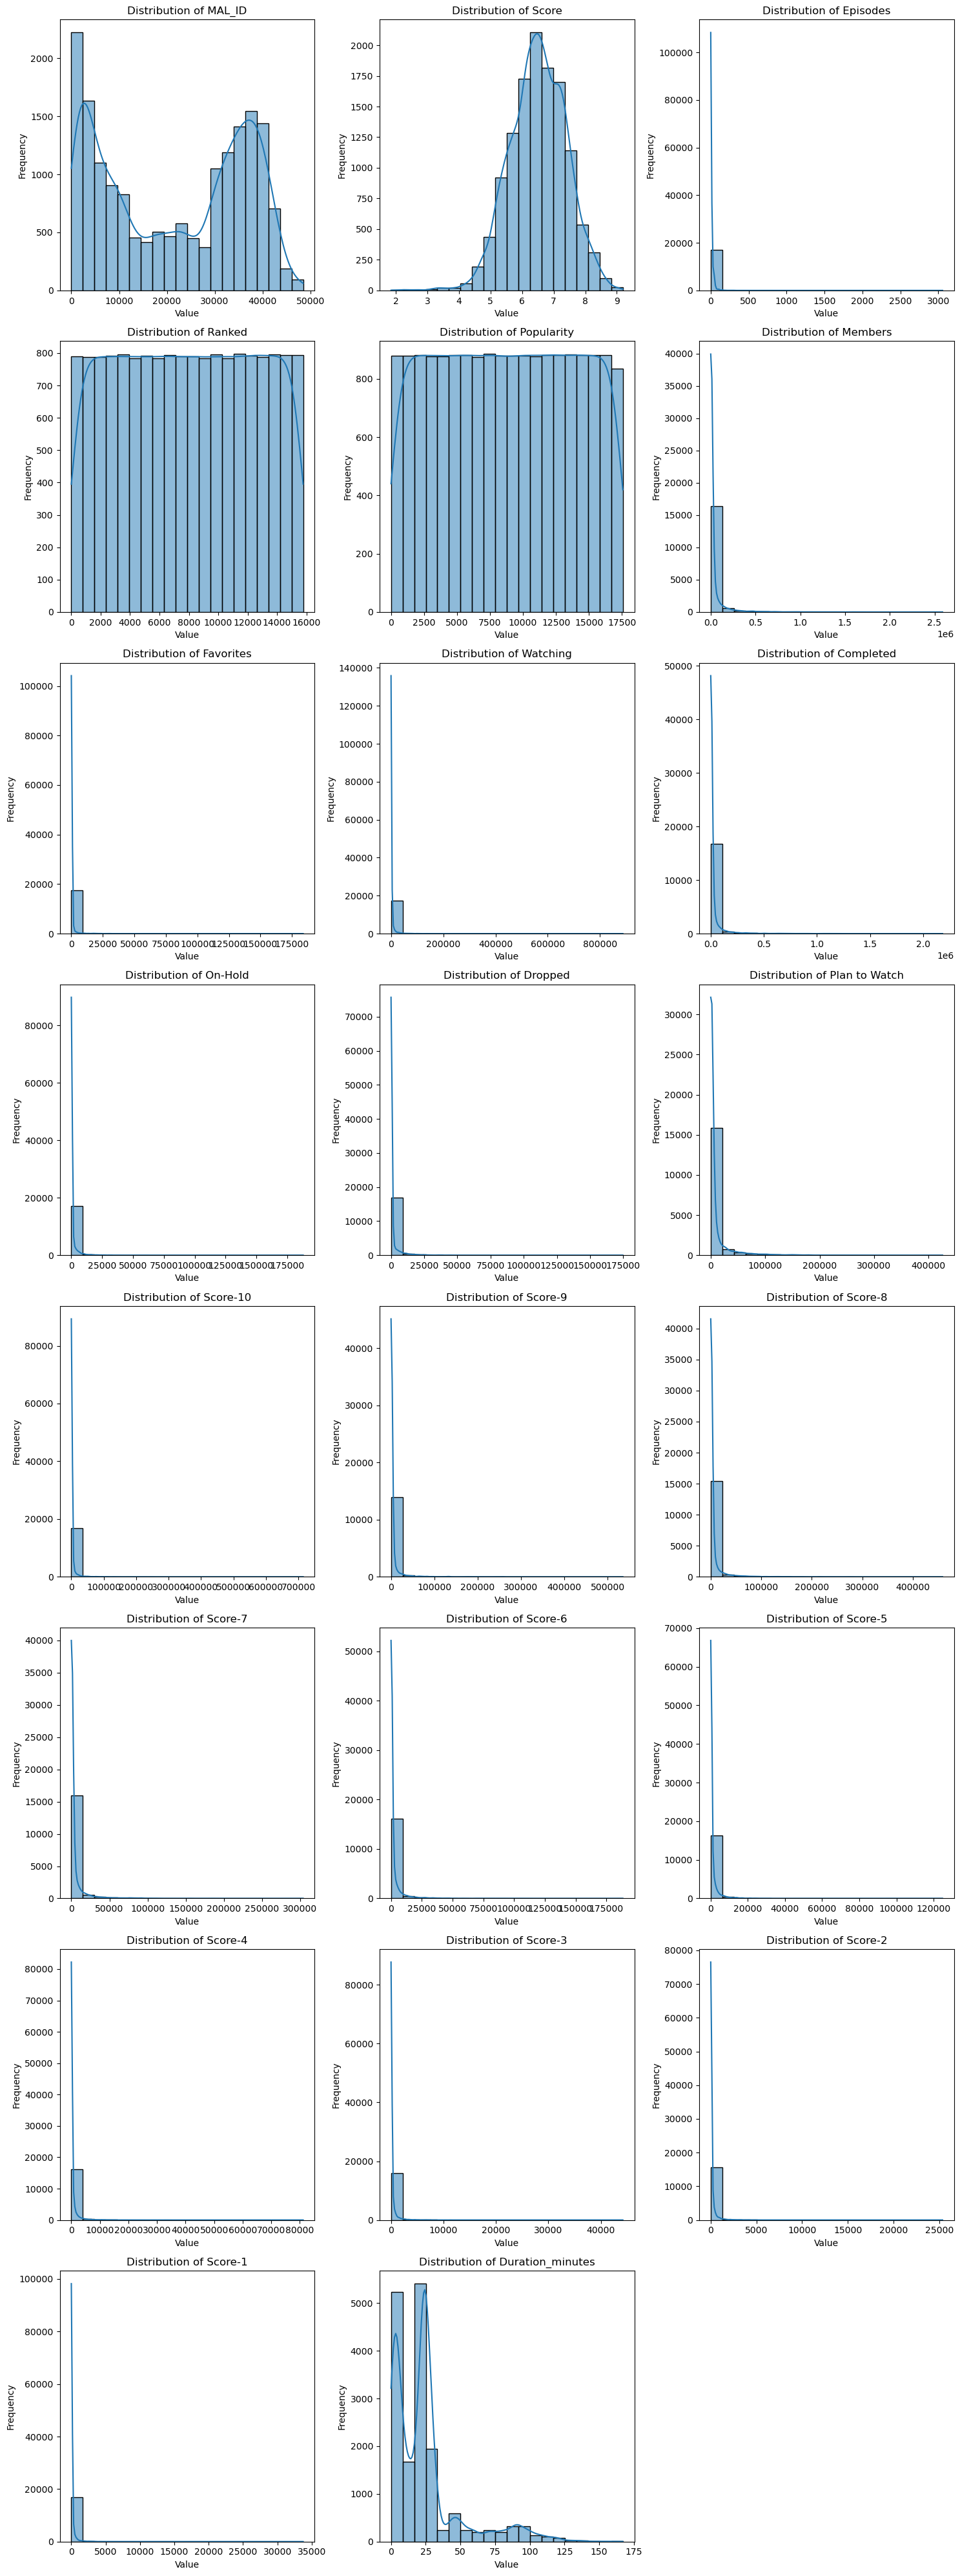

In [16]:
# plot histograms
# Get all numeric columns 
numeric_columns = anime.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed to display three graphs per row
num_cols_per_row = 3
num_rows = (len(numeric_columns) + num_cols_per_row - 1) // num_cols_per_row

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

# Iterate over numeric columns and create histograms
for i, col in enumerate(numeric_columns):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row

    sns.histplot(anime[col], bins=20, kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(numeric_columns), num_rows * num_cols_per_row):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

__Insights:__
1. Distribution of Duration in minutes is not what I expected. I didn't expect that first peak of really low values. 
2. Distribution of scores shows that there is a bell curve with the mean and median between 6 and 7. This looks how I would expect it to look. 

In [17]:
# What's going on with the duration in minutes data?
anime[(anime['Duration_minutes']<10)][['Name', 'Duration_minutes', 'Score', 'Popularity']]

,Name,Duration_minutes,Score,Popularity
269,Di Gi Charat,4.0,6.73,3895
279,Aa! Megami-sama!: Chichaitte Koto wa Benri da ne,7.0,6.92,3652
455,Damekko Doubutsu,5.0,7.29,4902
544,Kogepan,4.0,6.84,6186
546,Sexy Commando Gaiden: Sugoi yo!! Masaru-san,8.0,7.71,4803
...,...,...,...,...
17526,Ichiban Chikakute Tooi Hoshi,1.0,NaN,15826
17533,Fei Ren Zai 4th Season,5.0,NaN,16948
17538,Chocomatsu-san: White Day-hen,5.0,NaN,12349
17548,"The Sun, Moon and Stars",3.0,NaN,0


__Insights:__ While the duration per episode does seem too short to be true, I looked up some of these titles and they are indeed that short. 

In [18]:
anime[['Name', 'Score', 'Ranked']].sort_values(by='Ranked').head(50)

,Name,Score,Ranked
16761,Koukaku Kidoutai: SAC_2045 2nd Season,NaN,0.0
17548,"The Sun, Moon and Stars",NaN,0.0
3971,Fullmetal Alchemist: Brotherhood,9.19,1.0
15926,Shingeki no Kyojin: The Final Season,9.17,2.0
5683,Steins;Gate,9.11,3.0
14963,Shingeki no Kyojin Season 3 Part 2,9.10,4.0
9913,Gintama°,9.10,5.0
6474,Hunter x Hunter (2011),9.10,6.0
741,Ginga Eiyuu Densetsu,9.07,7.0
6006,Gintama',9.08,7.0


__Insights:__ It seems that ranking is just a reflection of the scoring. So if I fill in the null values in the score, I don't need to keep ranking around. It will be linearly correlated. Which brings me to my next EDA. I need to create a heatmap of the numerical columns. 

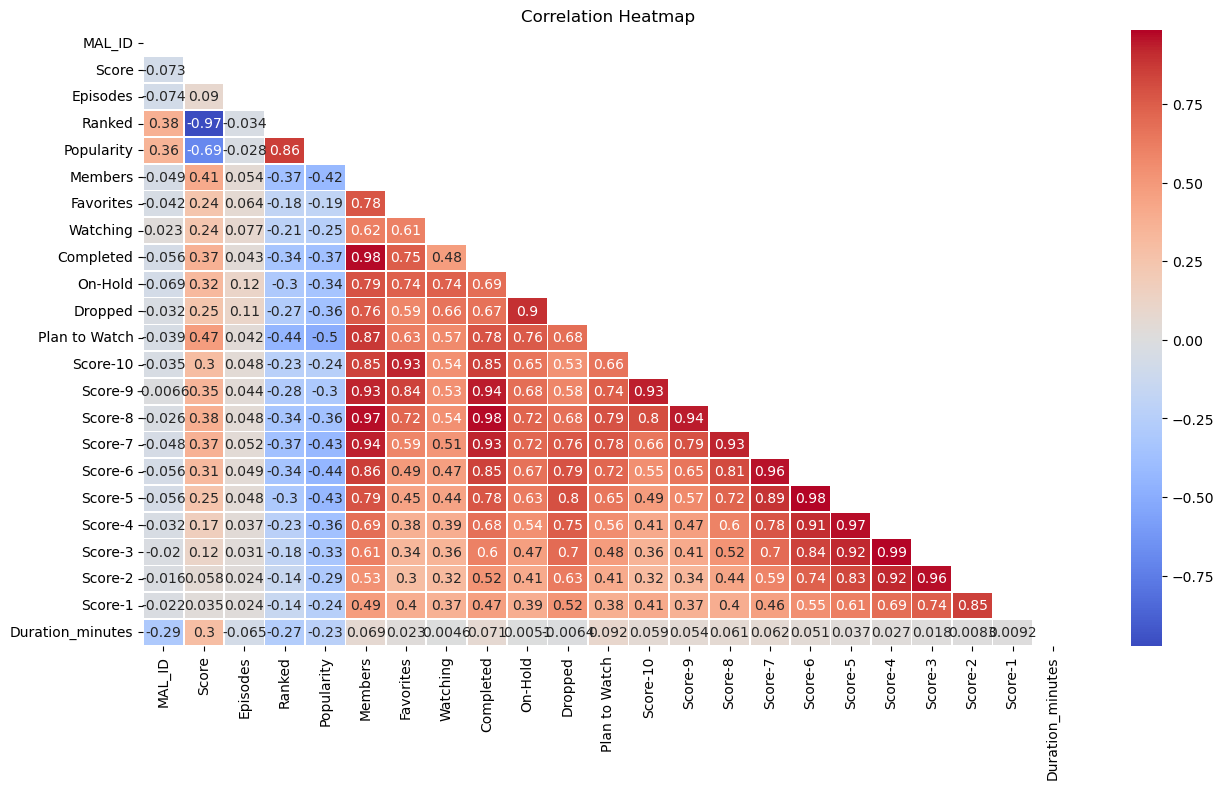

In [19]:
# Create a heatmap to look for correlations between numerical columns

# Get all numeric columns
numeric_columns = anime.select_dtypes(include=[np.number])

# Create a correlation matrix
cm = numeric_columns.corr()

# Create a mask to hide the upper part of the triangle
mask = np.triu(np.ones_like(cm, dtype=bool))

# Create a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

__Insights:__
There are quite a few cells that show strong correlations. Lets look more closely at them.
* Score was highly negatively correlated with ranking. This is because ranking is determined by the score (with the exception of rated R18+ not being included in rankings) 
* Popularity and ranking are highly correlated. The higher the ranking the more likely people are to have seen it. 
* Members and Completed are very highly correlated. It follows that the more people have completed the show, the more members have it on their list. 
* It also follows that the more people have the show marked on their list, the more people will have it tagged as 'plan to watch' as well as a higher score of 6-10. It goes along with the idea that the higher scored shows would be watched or planned to watch. 
* Favorites also is highly correlated with the higher score columns which is expected. So is completed. 
* The score columns (1-10) tend to highly correlate with the numerical score column directly above and directly below them. For example score-9 highly correlates with score-8 and score-10 but not with score-4. This makes sense overall a show will score within a certain range. 



### Consider doing a pairplot here
sns.pairplot(anime[['NumericColumn1', 'NumericColumn2', 'NumericColumn3']])
plt.show()

### Categorical Data


It's time to explore the categorical data

In [20]:
# Get Categorical Columns
categorical_columns = anime.select_dtypes(include=['object']).columns

In [21]:
anime[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           17562 non-null  object
 1   Genres         17499 non-null  object
 2   English name   6997 non-null   object
 3   Japanese name  17514 non-null  object
 4   Type           17525 non-null  object
 5   Aired          17253 non-null  object
 6   Premiered      4745 non-null   object
 7   Producers      9768 non-null   object
 8   Licensors      3946 non-null   object
 9   Studios        10483 non-null  object
 10  Source         13995 non-null  object
 11  Duration       17007 non-null  object
 12  Rating         16874 non-null  object
dtypes: object(13)
memory usage: 1.7+ MB


In [22]:
# Count unique categories
for column in categorical_columns:
    print(f"Value counts for '{column}':")
    print(anime[column].value_counts())
    print("\n")

Value counts for 'Name':
Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e    3
Youkoso! Ecolo Shima                                                                                   2
Hinamatsuri                                                                                            2
A-Channel+smile                                                                                        1
Seikai no Senki                                                                                        1
                                                                                                      ..
Mousou Kagaku Series: Wandaba Style                                                                    1
Isshuukan Friends. Specials                                                                            1
Beyblade Burst Sparking                                                                                1
Shinryaku! Ika Musume: Ika Ice

__Insights:__ 
   1. Some columns we can drop because they do not provide us useful informtion such as the the columns with names and the duration column. 
   2. The aired and premiered columns also don't have a lot of values for each category.
  3. Some columns such as genres needs to be expanded because there are often more than one listed in each row. 

In [23]:
# drop columns
reduced_cat_columns = categorical_columns.drop(['Name', 'English name', 'Japanese name', 'Aired', 'Premiered', 'Duration'])
reduced_cat_columns_df = anime[reduced_cat_columns]
reduced_cat_columns_df

,Genres,Type,Producers,Licensors,Studios,Source,Rating
0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity)
1,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity)
2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older
3,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older
4,"Adventure, Fantasy, Shounen, Supernatural",TV,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,PG - Children
...,...,...,...,...,...,...,...
17557,"Adventure, Mystery, Supernatural",ONA,NaN,NaN,NaN,Novel,NaN
17558,"Comedy, Horror, Supernatural",TV,Kadokawa,NaN,Passione,Manga,NaN
17559,"Mystery, Dementia, Horror, Psychological, Supe...",TV,NaN,NaN,NaN,Visual novel,R - 17+ (violence & profanity)
17560,"Adventure, Slice of Life, Comedy",TV,Kadokawa,NaN,8bit,Manga,PG-13 - Teens 13 or older


In [24]:
# Make a copy of reduced_cat_columns_df
exploded_cat_df = reduced_cat_columns_df.copy()
# Split the comma seperated values in the cells
exploded_cat_df['Genres'] = exploded_cat_df['Genres'].str.split(', ')
exploded_cat_df['Producers'] = exploded_cat_df['Producers'].str.split(', ')
exploded_cat_df['Licensors'] = exploded_cat_df['Licensors'].str.split(', ')

# Explode and create value counts
genre_val_counts = exploded_cat_df['Genres'].explode().value_counts()
producers_val_counts = exploded_cat_df['Producers'].explode().value_counts()
licensors_val_counts = exploded_cat_df['Licensors'].explode().value_counts()

# Value Counts for other columns
type_val_counts = reduced_cat_columns_df['Type'].value_counts()
studios_val_counts = reduced_cat_columns_df['Studios'].value_counts()
source_val_counts = reduced_cat_columns_df['Source'].value_counts()
rating_val_counts = reduced_cat_columns_df['Rating'].value_counts()

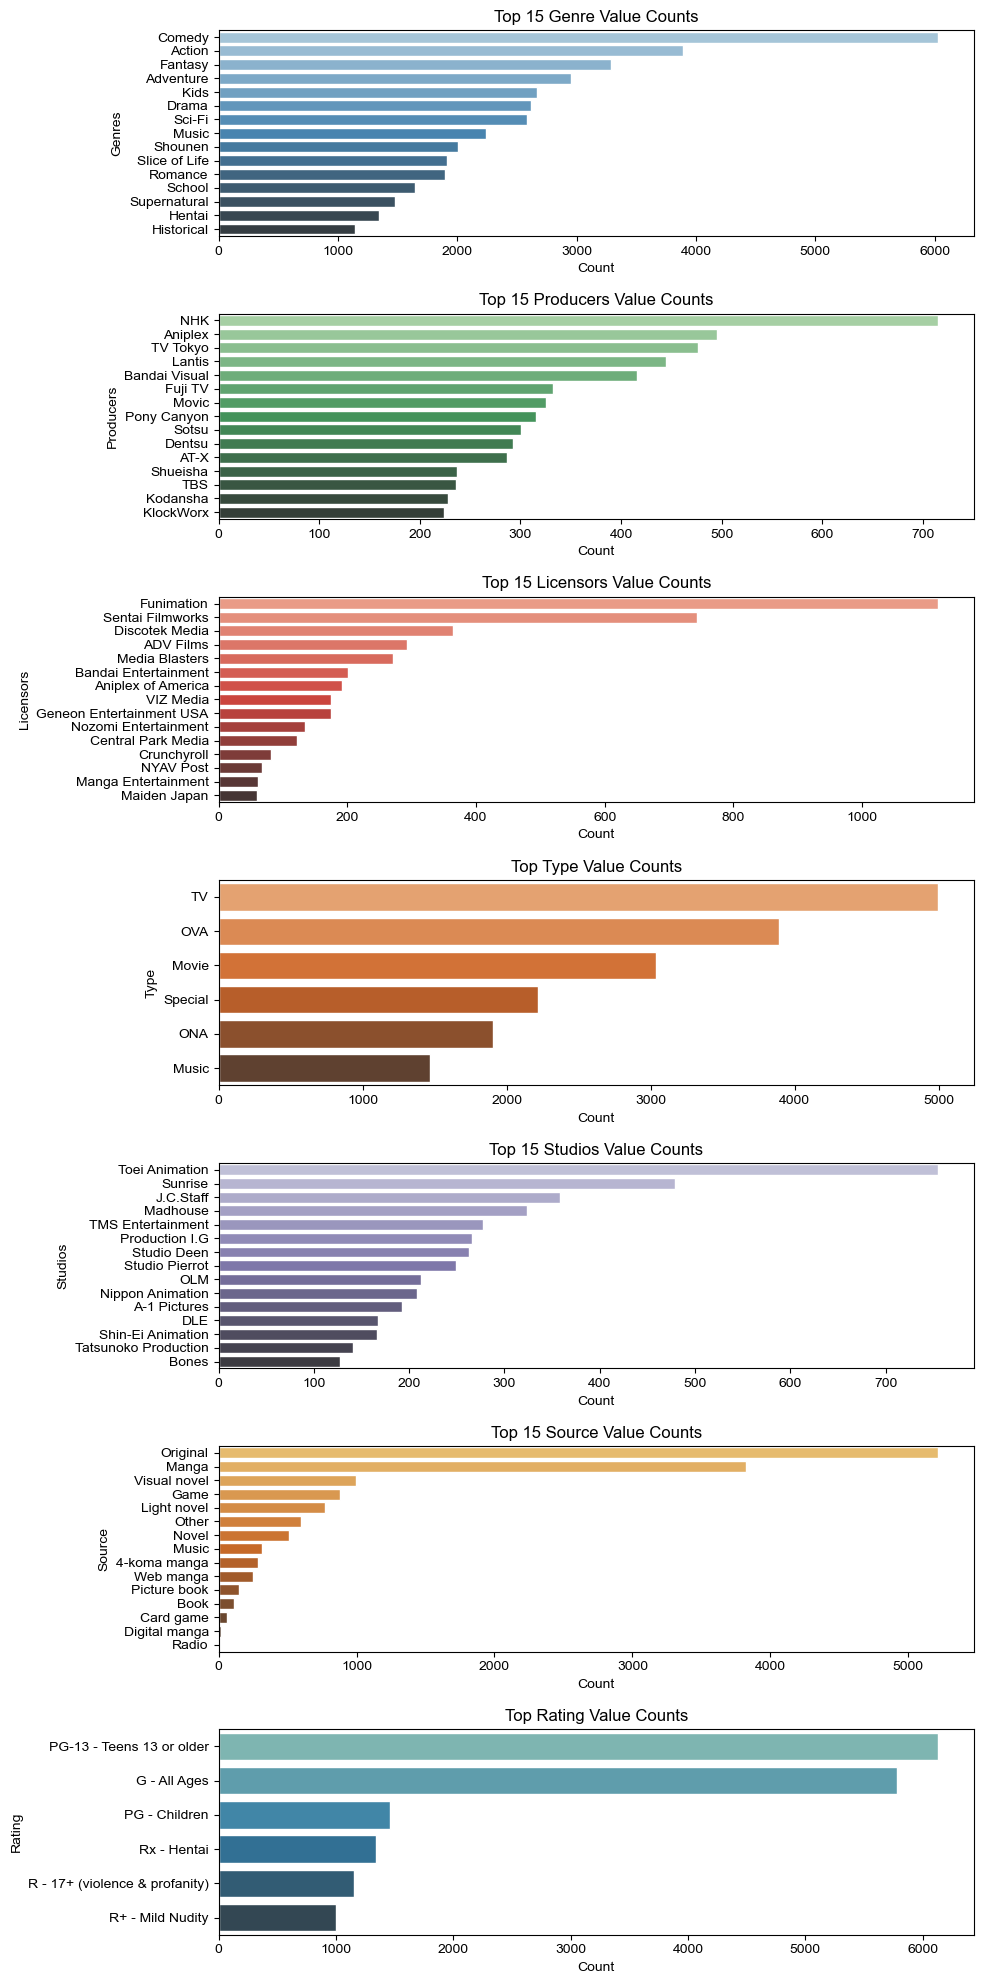

In [25]:
# Define the top 15 values and their corresponding counts
top_data = [
    (genre_val_counts.head(15), 'Top 15 Genre Value Counts', 'Genres', 'Blues_d'),
    (producers_val_counts.head(15), 'Top 15 Producers Value Counts', 'Producers', 'Greens_d'),
    (licensors_val_counts.head(15), 'Top 15 Licensors Value Counts', 'Licensors', 'Reds_d'),
    (type_val_counts.head(15), 'Top Type Value Counts', 'Type', 'Oranges_d'),
    (studios_val_counts.head(15), 'Top 15 Studios Value Counts', 'Studios', 'Purples_d'),
    (source_val_counts.head(15), 'Top 15 Source Value Counts', 'Source', 'YlOrBr_d'),
    (rating_val_counts.head(15), 'Top Rating Value Counts', 'Rating', 'YlGnBu_d')
]

# Create subplots
fig, axes = plt.subplots(len(top_data), 1, figsize=(10, 20))

# Customize Seaborn style
sns.set(style="whitegrid")

# Create and customize subplots for each category
for i, (data, title, xlabel, palette) in enumerate(top_data):
    sns.barplot(x=data.values, y=data.index, ax=axes[i], palette=palette)
    axes[i].set_title(title)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(xlabel)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



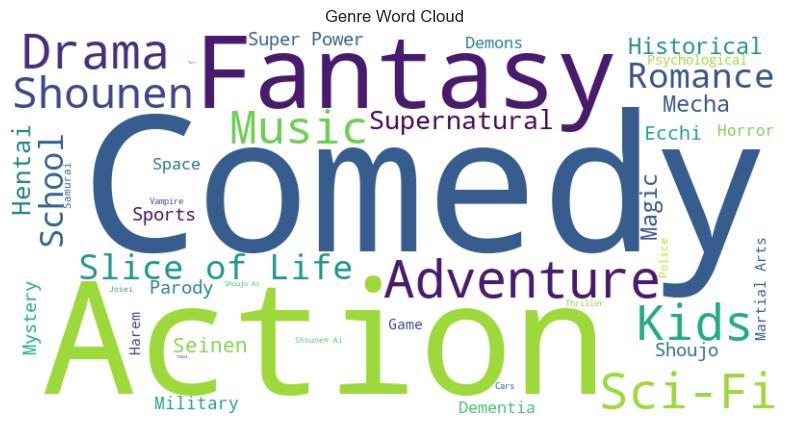

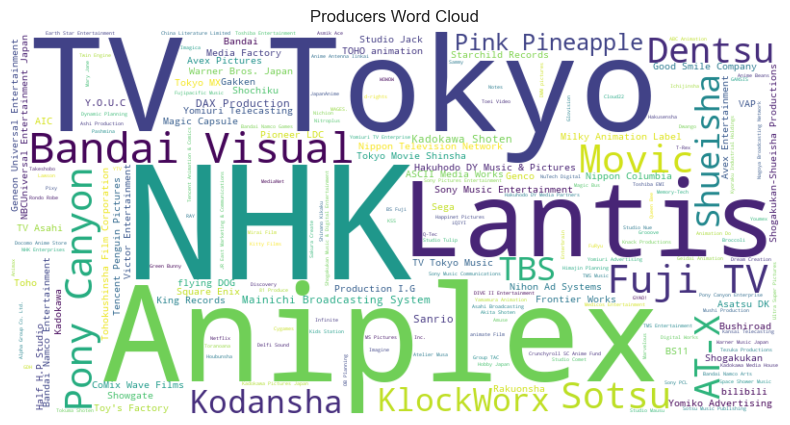

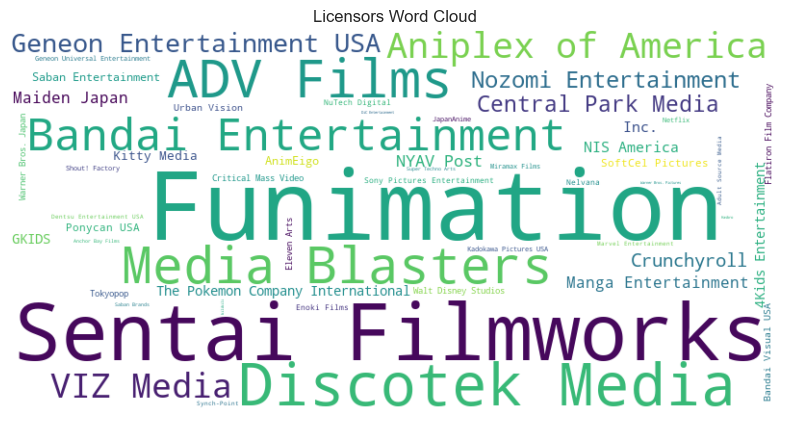

In [26]:
from wordcloud import WordCloud

# Create a WordCloud object with common settings
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Create word clouds for Genres, Producers, and Licensors
def create_wordcloud(data, title):
    # Convert the data (value counts) to a dictionary
    data_dict = data.to_dict()
    
    # Generate the word cloud from the data
    wordcloud.generate_from_frequencies(data_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for Genres, Producers, and Licensors
create_wordcloud(genre_val_counts, 'Genre Word Cloud')
create_wordcloud(producers_val_counts, 'Producers Word Cloud')
create_wordcloud(licensors_val_counts, 'Licensors Word Cloud')

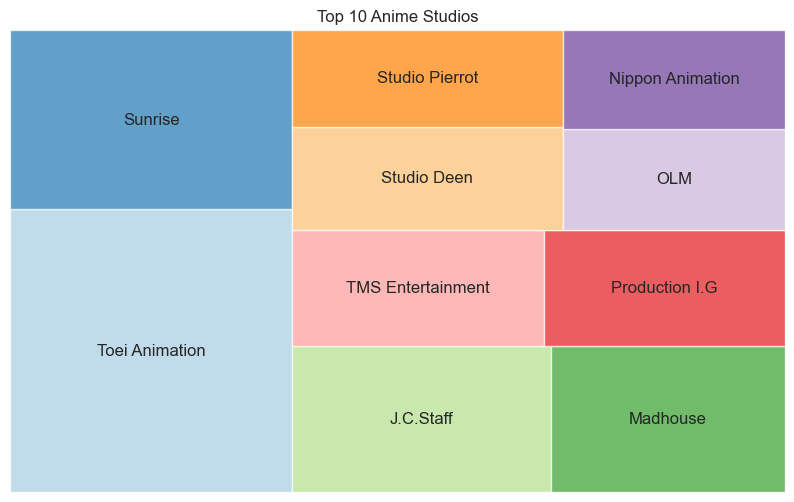

In [27]:
import squarify

# Data for anime studios 
studios = studios_val_counts.head(10).index
studio_counts = studios_val_counts.head(10).values

# Create a tree diagram
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(studios)))
squarify.plot(sizes=studio_counts, label=studios, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Top 10 Anime Studios')
plt.show()

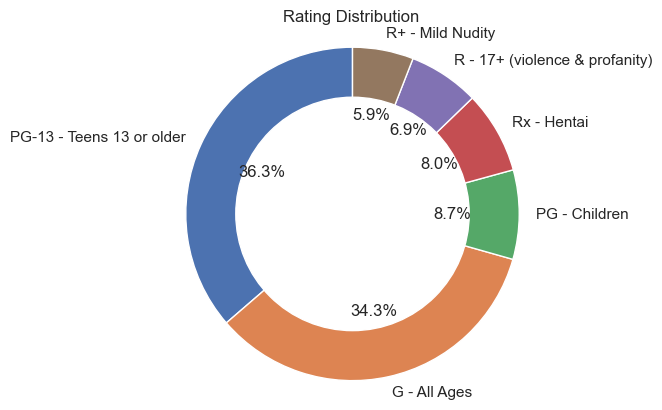

In [28]:
rating_counts = rating_val_counts.values
ratings = rating_val_counts.index

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(rating_counts, labels=ratings, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle in the center (donut hole)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Rating Distribution')
plt.show()

## Rating Dataset EDA

In [29]:
rating.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [30]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [31]:
rating.describe()

,user_id,anime_id,rating
count,5.763328e+07,5.763328e+07,5.763328e+07
mean,1.768878e+05,1.583147e+04,7.510789e+00
std,1.020117e+05,1.326114e+04,1.697722e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.827800e+04,3.091000e+03,7.000000e+00
50%,1.772910e+05,1.188700e+04,8.000000e+00
75%,2.654190e+05,2.899900e+04,9.000000e+00
max,3.534040e+05,4.845600e+04,1.000000e+01


In [32]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [33]:
rating.user_id.value_counts().describe()

count    310059.000000
mean        185.878423
std         255.290522
min           1.000000
25%          43.000000
50%         113.000000
75%         238.000000
max       15455.000000
Name: user_id, dtype: float64

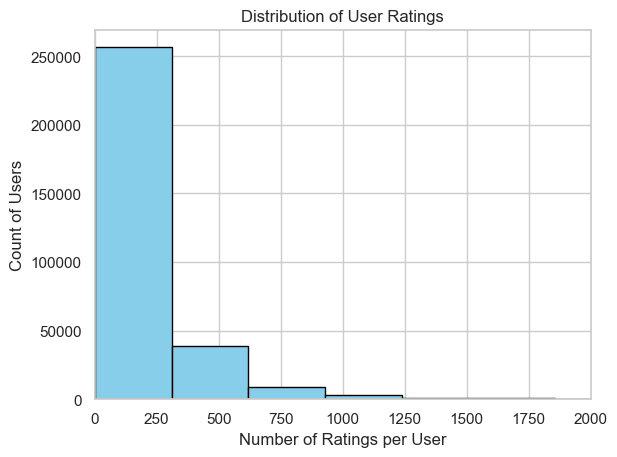

In [34]:
user_id_counts = rating['user_id'].value_counts()

# Create a histogram
plt.hist(user_id_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count of Users')
plt.title('Distribution of User Ratings')

plt.xlim(0, 2000)

plt.show()

Filter out users that have not rated very many anime and users that have rated too many anime (potentially spam accounts). 
We can drop people who have only rated 3 or fewer anime and users who have rated more than 300. 
Less than 3 anime seems like it won't give us very much info and is way below our first quarter mark of 43. 
More than 300 seems extreme and is still over our third quarter mark of 238. 


In [35]:
# Let's see what we will be dropping
lower = rating.user_id.value_counts() < 3
upper = rating.user_id.value_counts() > 300
print(f'lower amount to drop {lower[lower].shape}, upper amount to drop {upper[upper].shape} out of {rating.user_id.value_counts().shape}')

lower amount to drop (9865,), upper amount to drop (56253,) out of (310059,)


In [36]:
print(upper)

189037     True
162615     True
68042      True
283786     True
259790     True
          ...  
116446    False
280163    False
214672    False
233267    False
302053    False
Name: user_id, Length: 310059, dtype: bool


In [37]:
# Filter out all ratings that are above and below the set threshold
upper_index = upper[upper].index
lower_index = lower[lower].index
ratings = rating[~rating['user_id'].isin(upper_index) & ~rating['user_id'].isin(lower_index)]
print(f'original shape: {rating.shape} \n new shape: {ratings.shape}')

original shape: (57633278, 3) 
 new shape: (25812536, 3)


In [38]:
ratings.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [39]:
ratings.describe()

,user_id,anime_id,rating
count,2.581254e+07,2.581254e+07,2.581254e+07
mean,1.764255e+05,1.496663e+04,7.786135e+00
std,1.017699e+05,1.318319e+04,1.633077e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.842700e+04,2.251000e+03,7.000000e+00
50%,1.762160e+05,1.106100e+04,8.000000e+00
75%,2.642620e+05,2.817100e+04,9.000000e+00
max,3.534040e+05,4.845600e+04,1.000000e+01


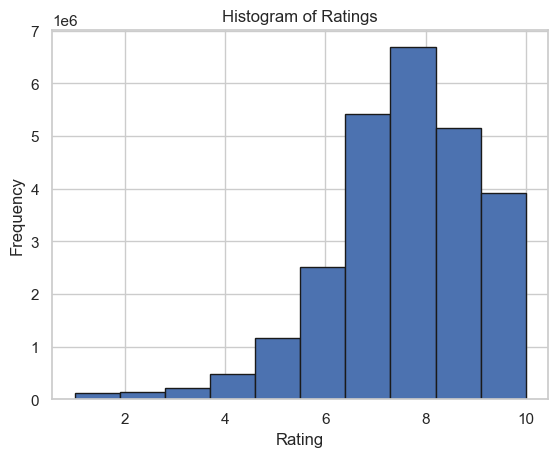

In [40]:
from matplotlib.ticker import ScalarFormatter

plt.hist(ratings['rating'], bins=10, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Get the current y-axis formatter
y_formatter = ScalarFormatter(useOffset=False)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.show()

In [41]:
ratings.head(2)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5


In [42]:
anime.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,24.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",NaN,...,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,2001-09-01,NaT,115.0


In [43]:
ratings['MAL_ID'] = ratings.anime_id
ratings.head()

/var/folders/95/k7qlx16d4kn1qw_fty0r8llh0000gn/T/ipykernel_1914/261159899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['MAL_ID'] = ratings.anime_id


,user_id,anime_id,rating,MAL_ID
0,0,430,9,430
1,0,1004,5,1004
2,0,3010,7,3010
3,0,570,7,570
4,0,2762,9,2762


In [44]:
ratings.drop(['anime_id'], axis=1, inplace=True)
ratings.head()

/Users/emmi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,user_id,rating,MAL_ID
0,0,9,430
1,0,5,1004
2,0,7,3010
3,0,7,570
4,0,9,2762


In [45]:
anime_ratings = ratings.merge(anime, on='MAL_ID')
anime_ratings.head()

,user_id,rating,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,...,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes
0,0,9,430,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",Fullmetal Alchemist:The Movie - Conqueror of S...,劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,...,44941.0,20077.0,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0
1,18,10,430,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",Fullmetal Alchemist:The Movie - Conqueror of S...,劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,...,44941.0,20077.0,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0
2,33,4,430,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",Fullmetal Alchemist:The Movie - Conqueror of S...,劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,...,44941.0,20077.0,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0
3,41,7,430,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",Fullmetal Alchemist:The Movie - Conqueror of S...,劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,...,44941.0,20077.0,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0
4,52,10,430,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",Fullmetal Alchemist:The Movie - Conqueror of S...,劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,...,44941.0,20077.0,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0


In [46]:
anime_ratings.shape

(25812536, 40)

In [48]:
%store anime_ratings

Stored 'anime_ratings' (DataFrame)


### Baseline Model

In [48]:
# Import Surprise
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

In [49]:
# Get data ready for Surprise
# With collaborative filtering, only user, item, and rating are needed
data = anime_ratings[['user_id', 'MAL_ID', 'rating']]

reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

In [50]:
# Create a train test split
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [51]:
# Instatiate svd
svd = SVD(n_factors=15, n_epochs=10, lr_all=0.005, reg_all=0.02, random_state=42)

# Fit to the training set
svd.fit(trainset)

# Create predictions
predictions = svd.test(testset)

# Measure the accuracy of the predictions
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)

RMSE: 3.2239
RMSE: 3.2238528002794453


__Insights:__ The baseline model's predictions were 3 points off from the actual ratings. This is a fairly large spread.

### Model 2

In [52]:
param_grid = {
    'n_factors': [15, 25, 50],
    'n_epochs': [10, 20, 30],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.04, 0.06]
}